In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('thesis dataset copy - Sheet1 (2).csv')
df.head()

,Date,Chemical Name,Price/Kg,Packing,Purity,Chemical Nature,Supplier Country,Storing Container,Supplier Company,Boiling Point,Composition,Usage,Price/MT,Quality
0,3/1/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
1,3/2/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
2,3/3/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
3,3/4/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
4,3/5/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good


In [ ]:
df=df.drop(columns=["Date"])
df.head()

,Chemical Name,Price/Kg,Packing,Purity,Chemical Nature,Supplier Country,Storing Container,Supplier Company,Boiling Point,Composition,Usage,Price/MT,Quality
0,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
1,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
2,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
3,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
4,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good


In [ ]:
columns_to_one_hot_encode=[
    'Chemical Name', 'Chemical Nature','Supplier Country','Storing Container','Supplier Company','Composition','Usage'
]

In [ ]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_one_hot_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))

In [ ]:
df = df.drop(columns=columns_to_one_hot_encode)
df=pd.concat([df,encoded_df],axis=1)

In [ ]:
# label_encoder = LabelEncoder()
# df['Quality'] = label_encoder.fit_transform(df['Quality'])

In [ ]:
pd.DataFrame(df)

,Price/Kg,Packing,Purity,Boiling Point,Price/MT,Quality,Chemical Name_Apriton,Chemical Name_PVA,Chemical Name_Pigment Gum,Chemical Name_Sodium Alginate,...,"Composition_Carbon, Hydrogen, Oxygen","Composition_Polyvinyl Acetate, Polyvinyl Alcohol",Composition_Sodium Alginate,"Composition_Styrene Acrylic, Water","Composition_Titanum, Oxygen",Usage_gum for paste hardening,Usage_printing and paste liquify,"Usage_used as a thickener, stabilizer, and gelling agent",Usage_used as glue,Usage_used in coatings and adhesives
0,432,25,72,2500.0,2870,Good,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,432,25,72,2500.0,2870,Good,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,432,25,72,2500.0,2870,Good,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,432,25,72,2500.0,2870,Good,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,432,25,72,2500.0,2870,Good,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,400,25,43,NaN,2300,Bad,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9306,400,25,43,NaN,2300,Bad,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9307,400,25,43,NaN,2300,Bad,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9308,400,25,43,NaN,2300,Bad,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#df.fillna(df.mean(), inplace=True)
X = df.drop(columns=['Quality'])
y = df['Quality']

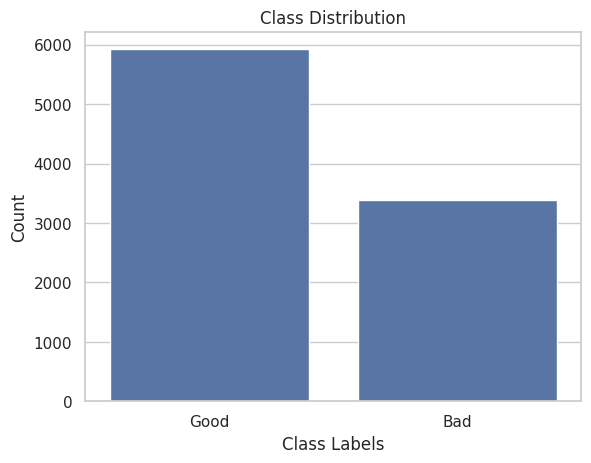

Class Proportions:
 class_label
Good    0.636412
Bad     0.363588
Name: count, dtype: float64
Imbalance Ratio: 1.7503692762186116
Gini Index: 0.46278328166588034


In [ ]:
df['class_label'] = y


class_counts = df['class_label'].value_counts()


sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


total_count = len(df)
class_proportions = class_counts / total_count
print('Class Proportions:\n', class_proportions)


imbalance_ratio = class_counts.max() / class_counts.min()
print(f'Imbalance Ratio: {imbalance_ratio}')


def gini_index(counts):
    total = sum(counts)
    probs = [count / total for count in counts]
    return 1 - sum([p ** 2 for p in probs])

gini = gini_index(class_counts.values)
print(f'Gini Index: {gini}')


class distribution over time

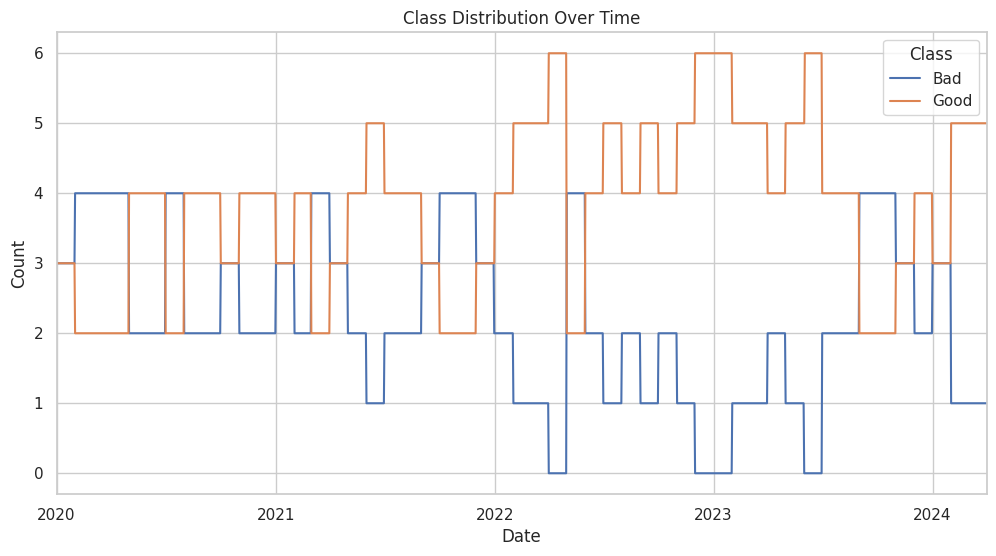

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('thesis dataset copy - Sheet1 (2).csv')

# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and class, then count the occurrences
class_counts = df.groupby(['Date', 'Quality']).size().unstack(fill_value=0)

# Plot the class distribution over time
plt.figure(figsize=(12, 6))
class_counts.plot(kind='line', ax=plt.gca())

plt.title('Class Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.show()


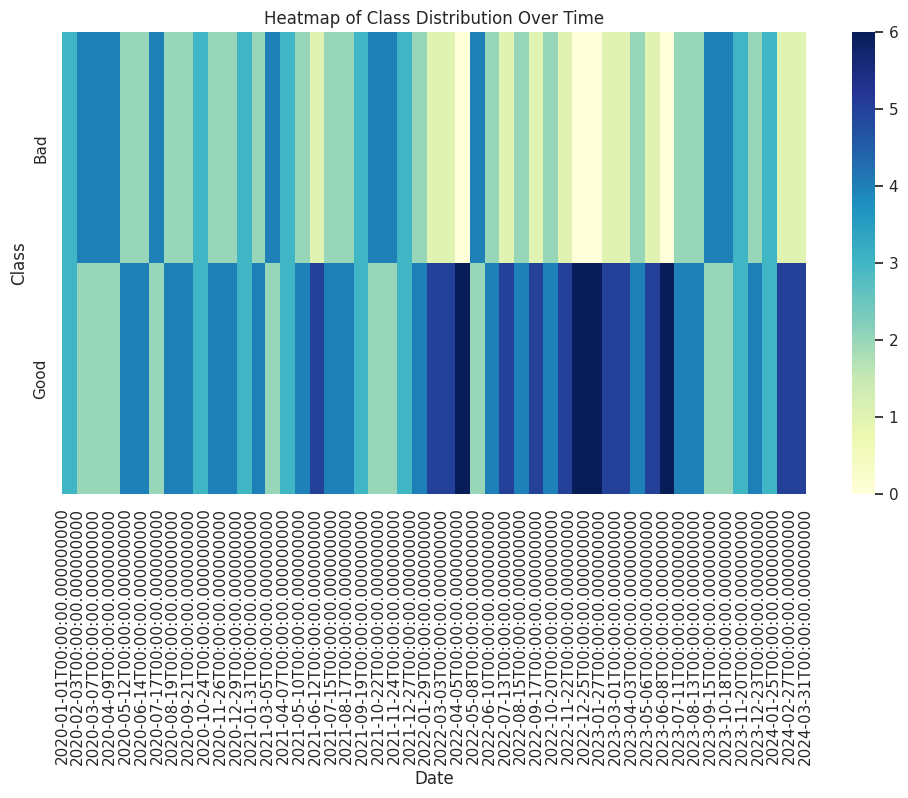

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(class_counts.T, cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Class Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Class')
plt.show()


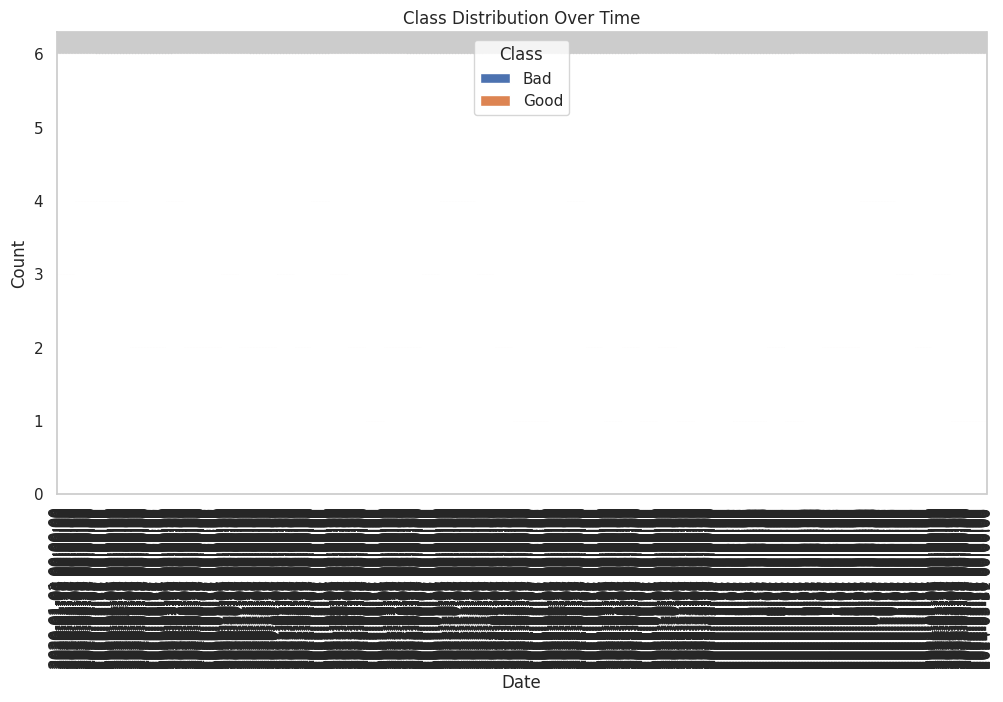

In [ ]:
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Class Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.show()


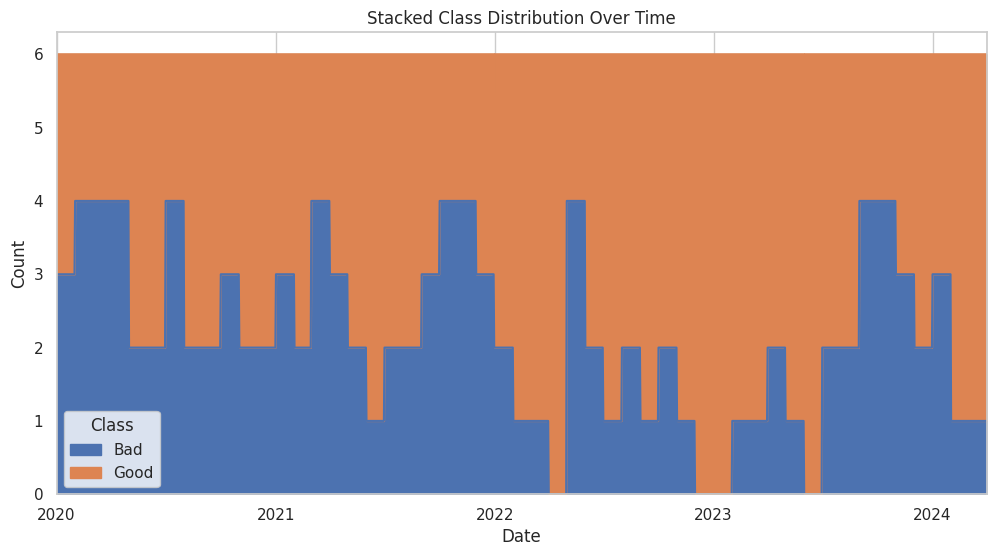

In [ ]:
plt.figure(figsize=(12, 6))
class_counts.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Stacked Class Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.show()


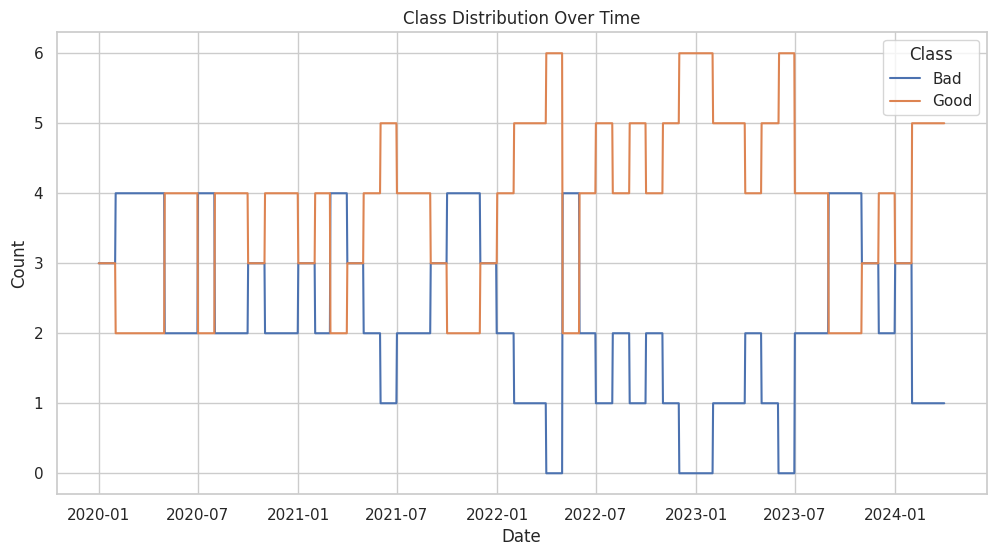

In [ ]:
plt.figure(figsize=(12, 6))
for column in class_counts.columns:
    plt.plot(class_counts.index, class_counts[column], label=column)
plt.title('Class Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.show()


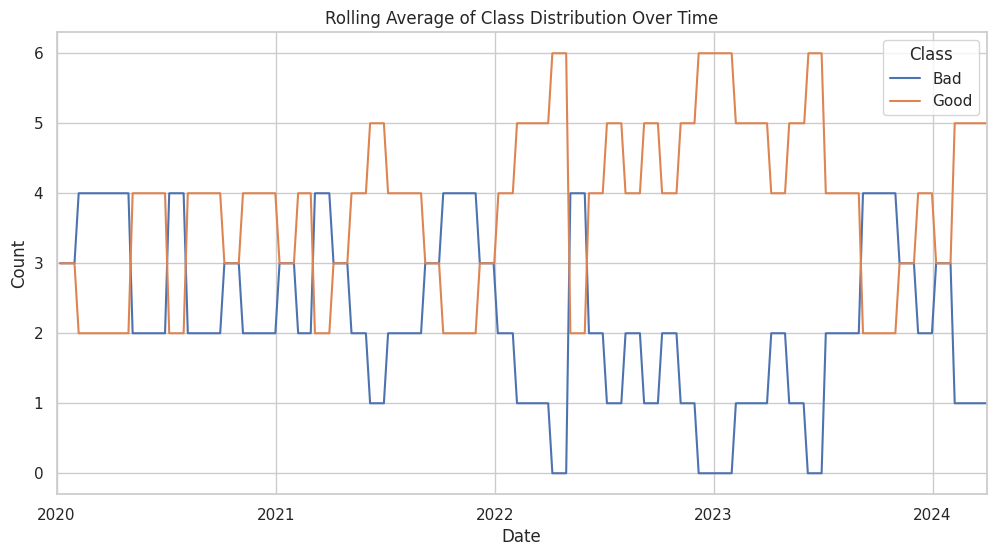

In [ ]:
plt.figure(figsize=(12, 6))
rolling_class_counts = class_counts.rolling(window=7).mean()  # 7-day rolling average
rolling_class_counts.plot(kind='line', ax=plt.gca())
plt.title('Rolling Average of Class Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.show()


['/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Ital

<ipython-input-19-8b9e6881daf2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.sum(axis=1), palette="muted")


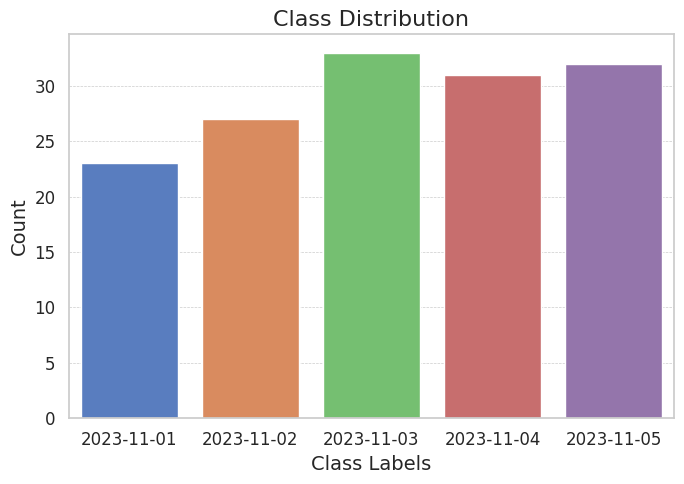

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.font_manager as fm

# List available fonts
fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(fonts)
sns.set(style="whitegrid")

# List available fonts
fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(fonts)

# Sample data (replace with your actual data)
# Assuming class_counts should be a pandas DataFrame
# Replace this with your actual data loading or creation
data = {'Class_A': [10, 12, 15, 13, 11],
        'Class_B': [8, 9, 11, 10, 12],
        'Class_C': [5, 6, 7, 8, 9]}
class_counts = pd.DataFrame(data, index=pd.date_range('2023-11-01', periods=5))

# Create the bar plot with improved aesthetics
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))  # Adjust figure size for publication
sns.barplot(x=class_counts.index, y=class_counts.sum(axis=1), palette="muted")

# Apply a different font (DejaVu Sans)
plt.xlabel('Class Labels', fontsize=14, family='DejaVu Sans')
plt.ylabel('Count', fontsize=14, family='DejaVu Sans')
plt.title('Class Distribution', fontsize=16, family='DejaVu Sans')

# Improve tick labels
plt.xticks(fontsize=12, family='DejaVu Sans')
plt.yticks(fontsize=12, family='DejaVu Sans')

# Add gridlines for clarity (optional)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Save the figure at 300 DPI for high quality
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

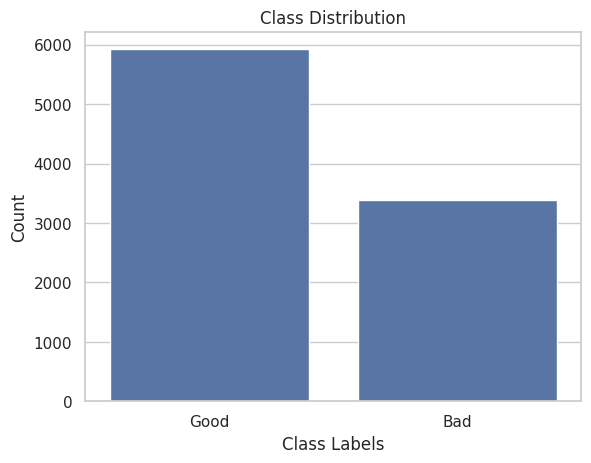

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code
df['class_label'] = y
class_counts = df['class_label'].value_counts()

# Create the bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')

# Save the plot with 300 DPI and in a high-quality format
plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()